In [63]:
import tweepy
import time
import csv
import os
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [64]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [65]:
os.chdir('/content/drive/MyDrive')
#Non-Negative Matrix Factorization (NMF), LDA , Bert

#getting set of all hashtags from the dataset

In [ ]:
df = pd.read_parquet('final_twitter_data.parquet')
df.drop_duplicates(subset=['tweet_id'])

In [6]:
dates=list()

for row,record in enumerate(df.hashtags):
  if record!='[]'and df['timestamp'][row][0:7]>'2021-05' : 
    dates.append(df['timestamp'][row][0:7])
date=list()
for dt in dates:
  if dt not in date:
    date.append(dt)

In [7]:
i=1
j=6
for i in range(1,3):
  for j in range(1,13):
    if i==1 and j>5 and j<10 or i==2 and j<10:
      globals()[f'hash202{i}_0{j}']=list()
      globals()[f'hash202{i}_0{j}'].extend([hash for row,hash in enumerate(df['hashtags']) if df['timestamp'][row][0:7]==f'202{i}-0{j}' and hash!='[]'])
        
    elif i==1 and j>5 and j>=10 or i==2 and j>=10:
      globals()[f'hash202{i}_{j}']=list()
      globals()[f'hash202{i}_{j}'].extend([hash for row,hash in enumerate(df['hashtags']) if df['timestamp'][row][0:7]==f'202{i}-{j}' and hash!='[]'])
      
#preprocessing the hashtags list from specific periods
i=1
j=6
for i in range(1,3):
  for j in range(1,13):
    if i==1 and j>5 and j<10 or i==2 and j<10:
      globals()[f'all_hashtags_202{i}_0{j}']=list()
      for s in globals()[f'hash202{i}_0{j}']:
          bb=s.split(', ')
          a=[re.search(r"[\[\']*(\w*)[\]\']*",i).group(1) for i in bb]
          globals()[f'all_hashtags_202{i}_0{j}'].extend(a)
        
        
    elif i==1 and j>5 and j>=10 or i==2 and j>=10:
      globals()[f'all_hashtags_202{i}_{j}']=list()
      for s in globals()[f'hash202{i}_{j}']:
          bb=s.split(', ')
          a=[re.search(r"[\[\']*(\w*)[\]\']*",i).group(1) for i in bb]
          globals()[f'all_hashtags_202{i}_{j}'].extend(a)


In [8]:
def hashtag_set_finder():
  hashtag_set=set()
  for dt in date:
      i,j = dt[3],dt[5:]
      lis = globals()[f'all_hashtags_202{i}_{j}']
      for i in lis:
        hashtag_set.add(i)
  return hashtag_set

In [9]:
hashtags_in_DS=hashtag_set_finder()

In [10]:
type(hashtags_in_DS)

set

In [ ]:
hashtags_in_DS

{'IchBinhanna',
 'jobopportunity',
 'FemArc',
 'Haushaltsdefizit',
 'Berufungen',
 'PublicHealth',
 'Rassismusmonitors',
 'Annayolivia',
 'astrology',
 'Rigaer',
 'IchBinHanna_AT',
 'HospitalPlaylist2',
 'letzteChance',
 'Newspeak',
 '12TageToStay',
 '2PfadePlus',
 'teamarbeitsrecht',
 'Coaching',
 'TrendingNow',
 'IchheissenichtHanna',
 'acertaindegreeofflexibility',
 'Bafoeg',
 'Kommunikation',
 'NichtNormal',
 'AKhilft',
 'researchjobs',
 'BlackBoxScience',
 'le1611',
 'DVPWBlog',
 'Freiburg',
 'EuGH',
 'ökoprogressiv',
 'ListenUpAcademia',
 'LDK21NRW',
 'McAfee',
 'EU4Health',
 'TUChemnitz',
 'ichbingeimpft',
 'Hochschulbetrieb',
 'Erziehungswissenschaften',
 'hannabeiderGEW',
 'WasHierStattfindet',
 'ChrisBiemann',
 'Dauerstellen',
 'FrauenInDerWissenschaft',
 'AcademicJobs',
 'interdisziplär',
 'Regenbogenfamilie',
 'facts',
 'JobSuche',
 'chancengerecht',
 'conditions',
 'TaxMeNow',
 'VR',
 '10jahrenawik',
 'lehre',
 'KHT2022',
 'LabComic',
 'möglichmachen',
 'richting',
 'Homop

#getting set of most frequent hashtags 

In [11]:
hashtags_in_DS2 = {i.lower() for i in hashtags_in_DS}

In [12]:
def generate_hashtags(dataset):
  listOfAllHashtags=list()
  for row, hash in enumerate(dataset.hashtags):
    if dataset['timestamp'][row][0:10]>="2021-06-01" and hash!='[]':
      bb=hash.split(', ') 
      
      a=[re.search(r"[\[\']*(\w*)[\]\']*",i).group(1) for i in bb]
      listOfAllHashtags.extend(a)
  listOfAllHashtagsL=[i.lower() for i in listOfAllHashtags]
  return listOfAllHashtagsL

In [13]:
list_of_all_hashtags = generate_hashtags(df)

In [14]:
list_of_mfh=[(i,list_of_all_hashtags.count(i)/len(list_of_all_hashtags)) for i in hashtags_in_DS2 if list_of_all_hashtags.count(i)>500]

In [15]:
list_of_mfh.sort(reverse=True , key= lambda k:k[1])

In [ ]:
list_of_mfh

[('ichbinhanna', 0.5046175287602235),
 ('wisszeitvg', 0.06530557355404232),
 ('ichbinreyhan', 0.042346296318935904),
 ('hannaimbundestag', 0.014861180727899556),
 ('dauerstellen', 0.014663129454625475),
 ('wisssystemfehler', 0.012149589838258127),
 ('wissenschaft', 0.011159333471887722),
 ('95vswisszeitvg', 0.010266880203430443),
 ('frististfrust', 0.007848698607528393),
 ('acertaindegreeofflexibility', 0.006579703412105578),
 ('berlhg', 0.005978214359939851),
 ('gegenwisszeitvg10', 0.005364499920534983),
 ('tvstud', 0.004650537305769161),
 ('ichbinhannah', 0.004357128012029781),
 ('bmbf', 0.0036627260168465834),
 ('hochschulen', 0.003298409477120188),
 ('wisskomm', 0.0029218675501546513),
 ('27juni', 0.0027311515092240547),
 ('stopthecuts', 0.0026798048828196633),
 ('academia', 0.0026529090308935535),
 ('evaluation', 0.002618677946623959),
 ('ugnovelle', 0.002582001784906537),
 ('ichbinhannaat', 0.002550215778084771),
 ('karliczek', 0.002293482646062814),
 ('hannabeidergew', 0.0022763

In [16]:
len(list_of_mfh)

50

In [17]:
input_hashtags = [i[0] for i in list_of_mfh]

In [ ]:
input_hashtags

#generating sentences from hashtags based on upper case letter

In [ ]:
new_ds=set()
for txt in hashtags_in_DS:
  for row,i in enumerate(txt):
      if i.isupper() and row>0:
         txt=txt.replace(i,f" {i}")
  new_ds.add(txt)
          

In [ ]:
"Ich Bin Reyhan" in new_ds

True

In [ ]:
txt="IchBinHanna"
for row,i in enumerate(txt):
  if i.isupper() and row>0:
    txt=txt.replace(i,f" {i}")
    print(txt)
    

Ich BinHanna
Ich Bin Hanna


In [ ]:
len(hashtags_in_DS)

8427

clustering hashtags 

#embedding details

In [ ]:
#from transformers import AutoTokenizer, AutoModelForMaskedLM

#tokenizer = AutoTokenizer.from_pretrained("bert-base-german-cased")

#model = AutoModelForMaskedLM.from_pretrained("bert-base-german-cased")

In [ ]:
#sentence = ['ich bin hanna','ich bin reyhan','wissen']
#Sentences are encoded by calling model.encode()
#input =tokenizer("ich bin hanna")
#embedding = model(**input)

In [ ]:
#from transformers import AutoTokenizer, AutoModel

#tokenizer = AutoTokenizer.from_pretrained("T-Systems-onsite/bert-german-dbmdz-uncased-sentence-stsb")

#model = AutoModel.from_pretrained("T-Systems-onsite/bert-german-dbmdz-uncased-sentence-stsb")

# part 1: 
find embedding , group them based on similarity 
similarity score above somrthing...
# part 2:
cluster based on some predifined groups

approach 1

In [ ]:
#from transformers import AutoTokenizer, AutoModel

#tokenizer = AutoTokenizer.from_pretrained("T-Systems-onsite/bert-german-dbmdz-uncased-sentence-stsb")

#model = AutoModel.from_pretrained("T-Systems-onsite/bert-german-dbmdz-uncased-sentence-stsb")

#part 1
Cross English & German RoBERTa for Sentence Embeddings
This model is intended to compute sentence (text) embeddings for English and German text.
as some hashtags are in english in our data

In [ ]:
!pip install -U sentence-transformers
from sentence_transformers import SentenceTransformer, util
model = SentenceTransformer('T-Systems-onsite/cross-en-de-roberta-sentence-transformer')


In [ ]:
sentence = ['researcher','ich arbeite als wissenschaftliche hilfskraft']
#as we have hashtags in both languages
embedding = model.encode(sentence)

In [ ]:
util.pytorch_cos_sim(embedding[0],embedding[1])

tensor([[0.7914]])

In [20]:
sentence = input_hashtags
embedding_full = model.encode(sentence)


In [21]:
clusterd_hashtags=list()
for hash in input_hashtags:
  embedding = model.encode(hash)
  sublist={hash}
  for j in range(len(input_hashtags)):
    if j<len(input_hashtags)-1:
      if util.pytorch_cos_sim(embedding,model.encode(input_hashtags[j+1])) > 0.5:
          sublist.add(input_hashtags[j+1])
          input_hashtags.remove(input_hashtags[j+1])
  clusterd_hashtags.append(sublist)

In [23]:
clusterd_hashtags.sort(reverse=True, key= lambda i: len(i))

In [24]:
print('these are the clustered hashtags out of the most 50 frequent hashtags in the data set\n')
for i in clusterd_hashtags:
  print(f'{i}\n') 

these are the clustered hashtags out of the most 50 frequent hashtags in the data set

{'ichwarhanna', 'ichbinreyhan', 'woisthanna', 'ichbinhannaat', 'ichbinhannach', 'ichbinhanna', 'ichbinhannah'}

{'gegenwisszeitvg10', 'daad', 'wisskomm', 'wisszeitvg'}

{'tvstud', 'dauerstellenfürdaueraufgaben', 'dauerstellen', 'entfristethanna'}

{'hrk', 'ugnovelle', 'berlhg'}

{'academia', 'hochschule', 'hochschulen'}

{'twittercampus', 'academictwitter', 'academicchatter'}

{'forschung', 'wissenschaft'}

{'frististfrust'}

{'stopthecuts'}

{'karliczek'}

{'hannaorganisiertsich'}

{'tenuretrack'}

{'firstgen'}

{'befristung'}

{'dasgewinnenwir'}

{'corona'}



In [67]:
# saving the clustered_hashtags
import pickle
#with open('clusterd_hashtags.txt','wb') as file:
#  pickle.dump(clusterd_hashtags, file) 
with open('clusterd_hashtags.txt','rb') as f:
  clusterd_hashtags=pickle.load(f)


# part 2 
here for each group we can take a representative 
+ Take one hashtag as representative hashtag of the group
+ Creating a representative by take average of the embeddings for each Group 

In [32]:
txt1="ichbinhanna"
group1=['woisthanna','ichbinhanna', 'ichbinhannaat', 'ichbinreyhan', 'ichbinhannah', 'ichbinhannach', 'ichwarhanna']
embedding1 = model.encode(txt1)
embedding2=model.encode(group1)
embedding3=np.mean(embedding2,axis=0)
sim1=[util.pytorch_cos_sim(embedding1,embedding2[i]) for i in range(len(group1))]
sim2=[util.pytorch_cos_sim(embedding3,embedding2[i]) for i in range(len(group1))]

In [57]:
print(sim1)
print(sim2)


[[[0.6229310035705566]], [[1.0000001192092896]], [[0.8514472246170044]], [[0.591450572013855]], [[0.9035950303077698]], [[0.8298851251602173]], [[0.7408745288848877]]]
[tensor([[0.7336]]), tensor([[0.9425]]), tensor([[0.8978]]), tensor([[0.6971]]), tensor([[0.8846]]), tensor([[0.8755]]), tensor([[0.8362]])]


In [59]:
sim1=np.array([i.tolist() for r,i in enumerate(sim1)]).reshape(7)
sim2=np.array([i.tolist() for r,i in enumerate(sim2)]).reshape(7)


In [62]:
print(f'here is the similarity of the Hashtag \"ichbinhanna\" (as representative of the group) to the other hashtags of the group: {np.mean(sim1)}')
print(f'here is the similarity, taking averaging of Hashtags embedding in the group as representative to the other hashtags of the group: {np.mean(sim2)}')

here is the similarity of the Hashtag "ichbinhanna" (as representative of the group) to the other hashtags of the group: 0.7914548005376544
here is the similarity, taking averaging of Hashtags embedding in the group as representative to the other hashtags of the group: 0.838197146143232


***which as is shown the second approach is more accurate (taking averaging of Hashtags embedding in a group as representative to the other hashtags of the group)***

In [ ]:

group1=['woisthanna','ichbinhanna', 'ichbinhannaat', 'ichbinreyhan', 'ichbinhannah', 'ichbinhannach', 'ichwarhanna']
def group_embedding(group):
  g_embed=np.mean(model.encode(list(group)),axis=0)
  return g_embed



In [68]:
len(clusterd_hashtags)

16

#groupwise trend evaluation of hashtags each 3 month 

In [ ]:
df = pd.read_parquet('final_twitter_data.parquet')

In [ ]:
df.drop_duplicates(subset=['tweet_id'])


In [ ]:
dates=list()

for row,record in enumerate(df.hashtags):
  if record!='[]'and df['timestamp'][row][0:7]>'2021-05' : 
    dates.append(df['timestamp'][row][0:7])


In [ ]:
date=list()
for dt in dates:
  if dt not in date:
    date.append(dt)


In [ ]:
date.sort()
date

In [74]:
date_each3= [dt for row, dt in enumerate(date) if row%3==0]

In [ ]:
date_each3

['2021-06', '2021-09', '2021-12', '2022-03', '2022-06', '2022-09']

In [ ]:
i=1
j=6
for i in range(1,3):
  for j in range(1,13):
    if i==1 and j>5 and j<10 or i==2 and j<10:
      globals()[f'hash202{i}_0{j}']=list()
      globals()[f'hash202{i}_0{j}'].extend([hash for row,hash in enumerate(df['hashtags']) if df['timestamp'][row][0:7]==f'202{i}-0{j}' and hash!='[]'])
        
    elif i==1 and j>5 and j>=10 or i==2 and j>=10:
      globals()[f'hash202{i}_{j}']=list()
      globals()[f'hash202{i}_{j}'].extend([hash for row,hash in enumerate(df['hashtags']) if df['timestamp'][row][0:7]==f'202{i}-{j}' and hash!='[]'])

In [ ]:
#preprocessing the hashtags list from specific periods
i=1
j=6
for i in range(1,3):
  for j in range(1,13):
    if i==1 and j>5 and j<10 or i==2 and j<10:
      globals()[f'all_hashtags_202{i}_0{j}']=list()
      for s in globals()[f'hash202{i}_0{j}']:
          bb=s.split(', ')
          a=[re.search(r"[\[\']*(\w*)[\]\']*",i).group(1) for i in bb]
          globals()[f'all_hashtags_202{i}_0{j}'].extend(a)
        
        
    elif i==1 and j>5 and j>=10 or i==2 and j>=10:
      globals()[f'all_hashtags_202{i}_{j}']=list()
      for s in globals()[f'hash202{i}_{j}']:
          bb=s.split(', ')
          a=[re.search(r"[\[\']*(\w*)[\]\']*",i).group(1) for i in bb]
          globals()[f'all_hashtags_202{i}_{j}'].extend(a)

In [76]:
def hashtag_counter(hash_ls,txt):
  lis=list()
  for hashtag in hash_ls:
    lis.append(hashtag.lower())
  return lis.count(txt.lower())

In [72]:
def hashtag_num_list(hashtag):
  hashtag_num=list()
  for dt in date_each3:
      i,j = dt[3],dt[5:]
      lis = globals()[f'all_hashtags_202{i}_{j}']
      hashtag_num.append(hashtag_counter(lis,hashtag))
  return hashtag_num

In [80]:
def group_hash_numlist(group):
  return np.sum([hashtag_num_list(i) for i in group],axis=0)

In [81]:
group_hash_numlist(clusterd_hashtags[1])

array([10864,   265,  2343,   309,   659,   843])

In [79]:
hashtag_num_list('ichbinhanna')

[77842, 2614, 4907, 4632, 10323, 13077]

In [106]:
def mf_g_hash(cluster):
  group_dic=dict()
  for r,group in enumerate(cluster):
    hash_num=np.sum([hashtag_num_list(i) for i in group])
    #group=list(group)
    group_dic[r]=hash_num
  group_dic=sorted(group_dic.items(),key= lambda k:k[1],reverse=True)
  return group_dic

In [107]:
most_frequent_groups=mf_g_hash(clusterd_hashtags)

In [108]:
most_frequent_groups

[(0, 121455),
 (1, 15283),
 (2, 3475),
 (6, 2502),
 (7, 1325),
 (4, 1182),
 (3, 1155),
 (5, 749),
 (9, 569),
 (13, 399),
 (11, 332),
 (12, 282),
 (8, 263),
 (15, 251),
 (10, 226),
 (14, 181)]

In [101]:
x

[('ichwarhanna', 121455),
 ('gegenwisszeitvg10', 15283),
 ('tvstud', 3475),
 ('forschung', 2502),
 ('frististfrust', 1325),
 ('academia', 1182),
 ('hrk', 1155),
 ('twittercampus', 749),
 ('karliczek', 569),
 ('befristung', 399),
 ('tenuretrack', 332),
 ('firstgen', 282),
 ('stopthecuts', 263),
 ('corona', 251),
 ('hannaorganisiertsich', 226),
 ('dasgewinnenwir', 181)]

In [110]:
new_hash_set=[i[0] for r,i in enumerate(most_frequent_groups) if r<8]

In [114]:
names=[i[0] for r,i in enumerate(x) if r<8]

In [130]:
for r,i in enumerate(clusterd_hashtags):
  print(f'group{r+1} : {i}')

group1 : {'ichwarhanna', 'ichbinreyhan', 'woisthanna', 'ichbinhannaat', 'ichbinhannach', 'ichbinhanna', 'ichbinhannah'}
group2 : {'gegenwisszeitvg10', 'daad', 'wisskomm', 'wisszeitvg'}
group3 : {'tvstud', 'dauerstellenfürdaueraufgaben', 'dauerstellen', 'entfristethanna'}
group4 : {'hrk', 'ugnovelle', 'berlhg'}
group5 : {'academia', 'hochschule', 'hochschulen'}
group6 : {'twittercampus', 'academictwitter', 'academicchatter'}
group7 : {'forschung', 'wissenschaft'}
group8 : {'frististfrust'}
group9 : {'stopthecuts'}
group10 : {'karliczek'}
group11 : {'hannaorganisiertsich'}
group12 : {'tenuretrack'}
group13 : {'firstgen'}
group14 : {'befristung'}
group15 : {'dasgewinnenwir'}
group16 : {'corona'}


In [141]:
names

['ichwarhanna',
 'gegenwisszeitvg10',
 'tvstud',
 'forschung',
 'frististfrust',
 'academia',
 'hrk',
 'twittercampus']

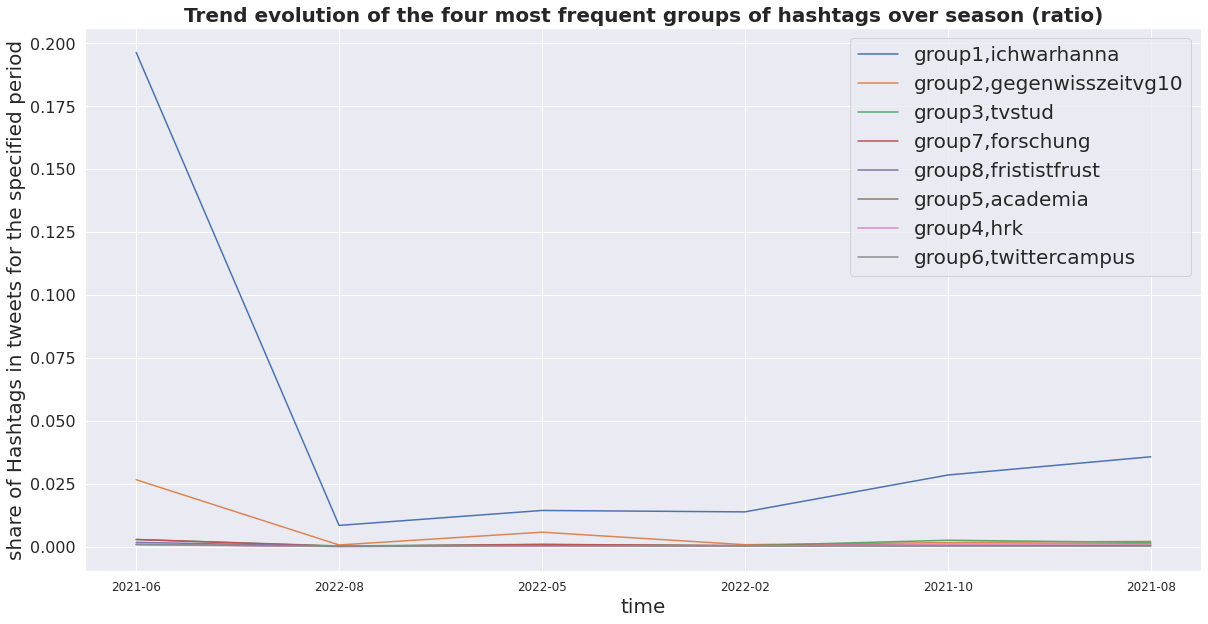

In [132]:
%matplotlib inline
sns.set(style="darkgrid")
fig = plt.figure(figsize = (20, 10))
for i in new_hash_set:
  plt.plot(date_each3,np.array(group_hash_numlist(clusterd_hashtags[i]))/np.size(list_of_all_hashtags))#/summ

plt.legend([f'group{j+1},{names[r]}' for r,j in enumerate(new_hash_set) ], fontsize=20) 
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 16)

plt.xlabel("time",fontsize = 20)
plt.ylabel("share of Hashtags in tweets for the specified period",fontsize = 20)
plt.title("Trend evolution of the four most frequent groups of hashtags over season (ratio)",fontsize = 20,fontweight='bold')
plt.show()



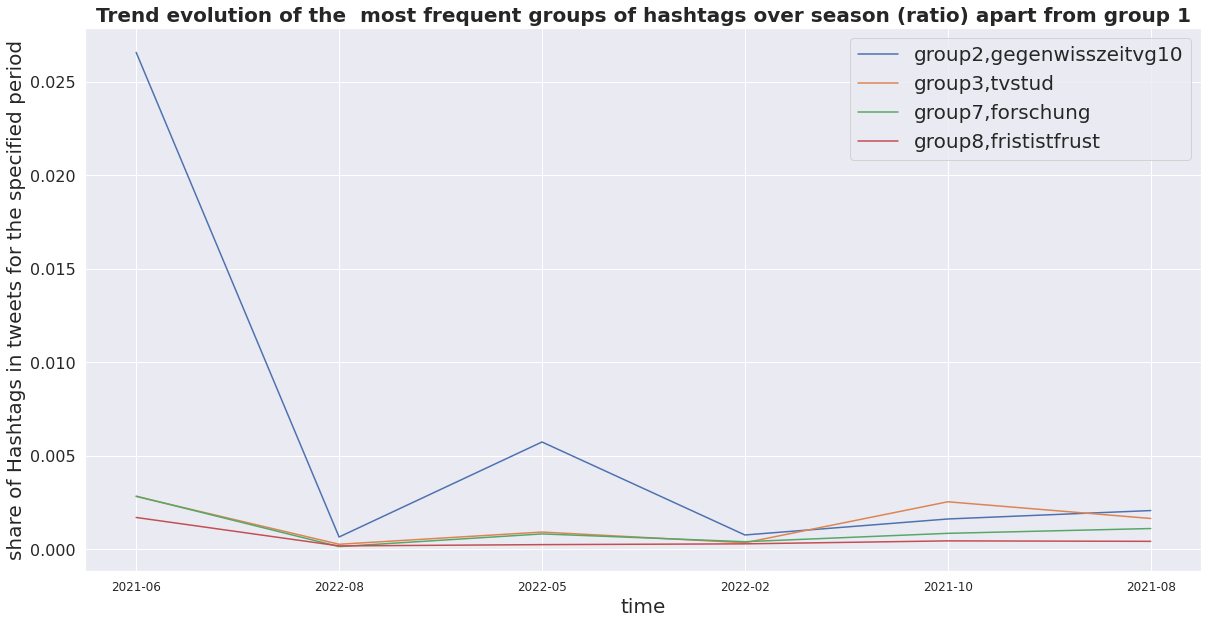

In [144]:
%matplotlib inline
sns.set(style="darkgrid")
fig = plt.figure(figsize = (20, 10))
for i in new_hash_set[1:5]:
  plt.plot(date_each3,np.array(group_hash_numlist(clusterd_hashtags[i]))/np.size(list_of_all_hashtags))#/summ

plt.legend([f'group{j+1},{names[r+1]}' for r,j in enumerate(new_hash_set[1:5]) ], fontsize=20) 
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 16)

plt.xlabel("time",fontsize = 20)
plt.ylabel("share of Hashtags in tweets for the specified period",fontsize = 20)
plt.title("Trend evolution of the  most frequent groups of hashtags over season (ratio) apart from group 1",fontsize = 20,fontweight='bold')
plt.show()



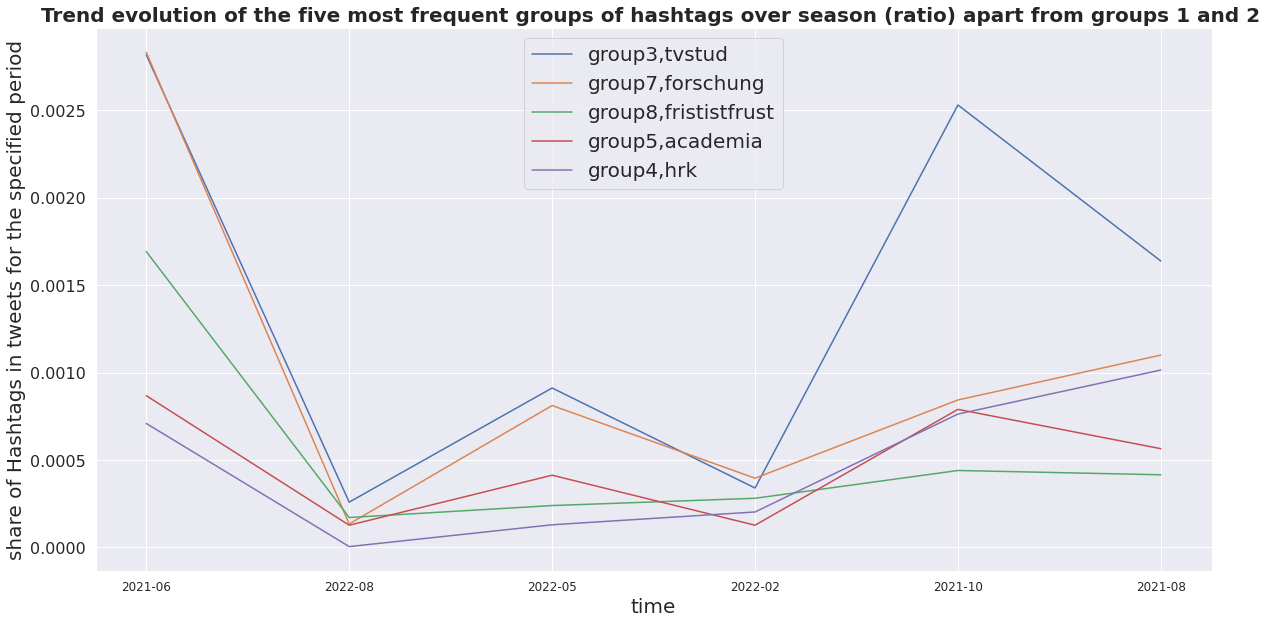

In [143]:
%matplotlib inline
sns.set(style="darkgrid")
fig = plt.figure(figsize = (20, 10))
for i in new_hash_set[2:7]:
  plt.plot(date_each3,np.array(group_hash_numlist(clusterd_hashtags[i]))/np.size(list_of_all_hashtags))#/summ

plt.legend([f'group{j+1},{names[r+2]}' for r,j in enumerate(new_hash_set[2:7]) ], fontsize=20) 
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 16)

plt.xlabel("time",fontsize = 20)
plt.ylabel("share of Hashtags in tweets for the specified period",fontsize = 20)
plt.title("Trend evolution of the five most frequent groups of hashtags over season (ratio) apart from groups 1 and 2 ",fontsize = 20,fontweight='bold')
plt.show()



# TSNE

In [ ]:
from sklearn.manifold import TSNE
import pandas as pd
import seaborn as sns
 
# We want to get TSNE embedding with 2 dimensions
n_components = 2
tsne = TSNE(n_components)
tsne_result = tsne.fit_transform(embedding_full)
tsne_result.shape
# (1000, 2)
# Two dimensions for each of our images
 
# Plot the result of our TSNE with the label color coded
# A lot of the stuff here is about making the plot look pretty and not TSNE

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


(50, 2)

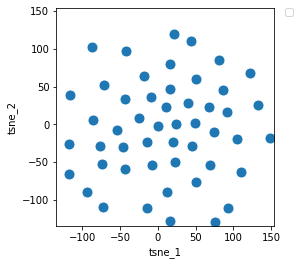

In [ ]:
tsne_result_df = pd.DataFrame({'tsne_1': tsne_result[:,0], 'tsne_2': tsne_result[:,1]})
fig, ax = plt.subplots(1)
sns.scatterplot(x='tsne_1', y='tsne_2', data=tsne_result_df, ax=ax,s=120)
lim = (tsne_result.min()-5, tsne_result.max()+5)
ax.set_xlim(lim)
ax.set_ylim(lim)
ax.set_aspect('equal')
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)

In [ ]:
n_components = 2
tsne = TSNE(n_components)
tsne_result = tsne.fit_transform(ff)
tsne_result.shape